In [1]:
%cd matlab
pwd
clear all
imatlab_export_fig('print-svg')  % Static svg figures.
format compact

ans =
    '/Users/eechris/code/src/github.com/cpjobling/eglm03-textbook/03/6'


In [2]:
s = tf('s');
G = 1/(s*(s+4));
H=1;

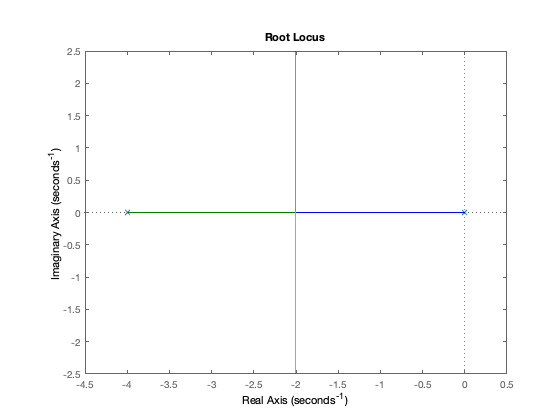

In [3]:
GH = series(G,H);
rlocus(GH)

In [4]:
s1 = -2+2j;
K0 = rlocfind(GH,s1)

K0 =
     8


In [5]:
Gc1 = feedback(K0*G,H);
[y1,t1]=step(Gc1,10);

In [6]:
K=40;
Kc = K0/K

Kc =
    0.2000


In [7]:
abs(s1)

ans =
    2.8284


In [8]:
z0 = -3/10

z0 =
   -0.3000


In [9]:
p0 = Kc*z0

p0 =
   -0.0600


In [10]:
Dlag = zpk([z0],[p0],Kc)


Dlag =


  0.2 (s+0.3)


  -----------


   (s+0.06)


Continuous-time zero/pole/gain model.



In [11]:
Go2 = Dlag*GH


Go2 =


    0.2 (s+0.3)


  ----------------


  s (s+0.06) (s+4)


Continuous-time zero/pole/gain model.



In [12]:
[poles] = rlocus(Go2,K)

poles =
  -1.8576 + 1.8730i
  -1.8576 - 1.8730i
  -0.3449 + 0.0000i


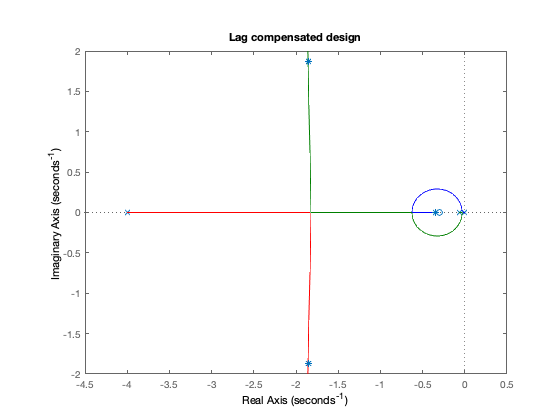

In [13]:
rlocus(Go2),hold on,plot(poles,'*'),...
    title('Lag compensated design'),...
    hold off

In [14]:
Gc2 = feedback(K*Dlag*G,H)


Gc2 =


              8 (s+0.3)


  ---------------------------------


  (s+0.3449) (s^2 + 3.715s + 6.959)


Continuous-time zero/pole/gain model.



In [15]:
[y2,t2]=step(Gc2,10);

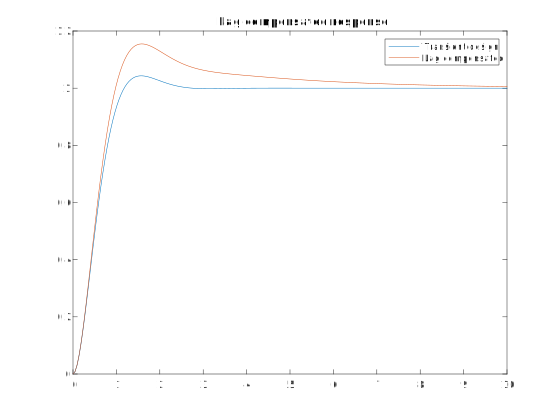

In [16]:
plot(t1,y1,t2,y2),title('Lag compensated response'),...
    legend('Transient design','Lag compensated')

In [17]:
Ge1 = 1/(1+K0*G*H);
[y3,t3]=step(Ge1*1/s,10);


In [18]:
Ge2 = 1/(1+K*Dlag*G*H);
[y4,t4]=step(Ge2*1/s,10);

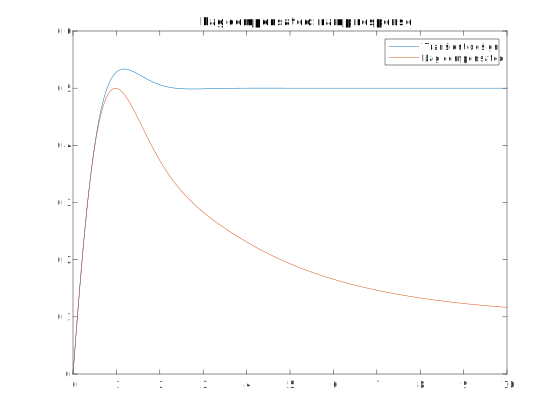

In [19]:
plot(t3,y3,t4,y4),title('Lag compensated: ramp response'),...
    legend('Transient design','Lag compensated')

In [20]:
%%file params.m
% PARAMS - parameters for Lag Compensator Simulation
K0 = 8
Kc = 8/40
K = 8/Kc

G = tf(1,conv([1,0],[1,4]))
Clag = Kc*tf([1, 0.3],[1, 0.06])

H = 1;
F = 1;

K0 =
     8


Kc =
    0.2000


K =
    40



G =


      1


  ---------


  s^2 + 4 s


Continuous-time transfer function.




Clag =


  0.2 s + 0.06


  ------------


    s + 0.06


Continuous-time transfer function.

